In [1]:
from input_feeder import InputFeeder
from face_detection import FaceDetection
from emotions_recognition import EmotionsRecognition
from face_reidentification import FaceReidentification

import time
import os
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
parent_dir =  os.path.split(os.getcwd())[0]

input_video = os.path.join(parent_dir,'input_video','netflix.mp4')

input_feeder = InputFeeder('video',input_video)
input_feeder.load_data()

face_detection= FaceDetection()
face_detection.load_model()

emotions_recognition = EmotionsRecognition()
emotions_recognition.load_model()

face_reidentification = FaceReidentification()
face_reidentification.load_model()

In [76]:
face_vectors_db = []
emotions_db = {}
faces_db = {}

In [77]:
def update_(face,face_emotion,face_vector):
    
    similarity = [0]
    for face_vector_cmp in face_vectors_db:
        similarity.append(cosine_similarity(face_vector,face_vector_cmp))
    
    if max(similarity)>0.5:
        faces_db[np.argmax(similarity)-1].append(face)
        emotions_db[np.argmax(similarity)-1].append(face_emotion)
        
    else:
        face_vectors_db.append(face_vector)
        faces_db[len(faces_db)] = [face]
        emotions_db[len(emotions_db)] = [face_emotion]

In [78]:
for frame in input_feeder.next_batch():
    if frame is None:
        break
    bbox_frame,faces,cords = face_detection.predict(frame)
    for face in faces:
        face_emotion = emotions_recognition.predict(face)
        face_vector  = face_reidentification.predict(face)
        update_(face,face_emotion,face_vector)

In [79]:
def show_faces_db():
    print(f"The number face detected are {len(faces_db)}")
    j = 0
    plt.figure(figsize=(20,10))
    for i,v in faces_db.items():
        j = j+1
        img = cv2.resize(v[0], (50,50))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.subplot(1,len(faces_db),j)
        plt.imshow(img,interpolation='bilinear')
        plt.title(f"FACE_{i}")
        plt.axis(False)
    plt.show()

The number face detected are 15


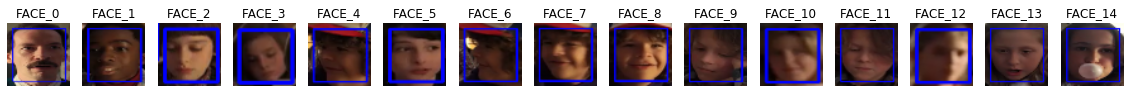

In [80]:
show_faces_db()